## Import libraries

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## View the dataset

In [226]:
data = pd.read_csv("data.csv")
datasize = len(data)
print(f"Size of data is {datasize}")
data

Size of data is 24


,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


Text(0, 0.5, 'price')

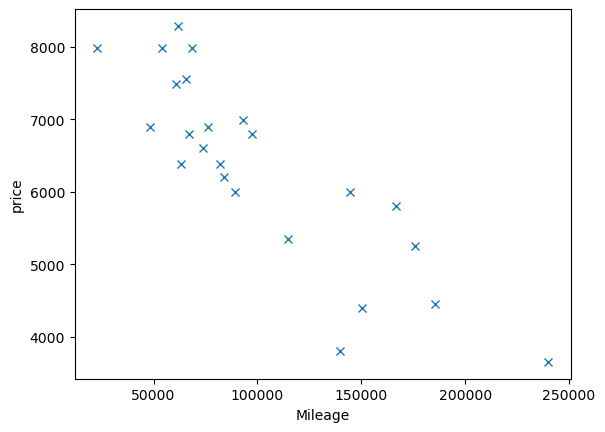

In [227]:
x = np.array(data["km"])
y = np.array(data["price"])

plt.plot(x, y, 'x')
plt.xlabel("Mileage")
plt.ylabel("price")

## The correct answer for reference



The expected value for m = -0.0214489636 & c = 8499.59965


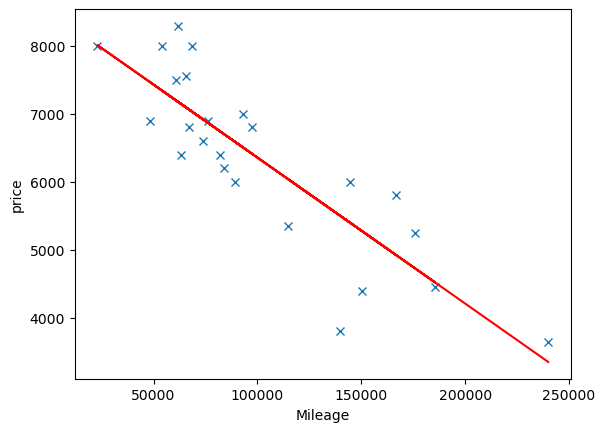

In [228]:
expected_m, expected_c = np.polyfit(x, y, 1)

plt.plot(x, y, 'x')
plt.xlabel("Mileage")
plt.ylabel("price")
plt.plot(x, x * expected_m + expected_c, "r")

print(f"The expected value for m = {expected_m:.9} & c = {expected_c:.9}")

## Normalize dataset to avoid overflow

[Text(0.5, 1.0, 'After Normalize'),
 Text(0.5, 0, 'Mileage'),
 Text(0, 0.5, 'Price')]

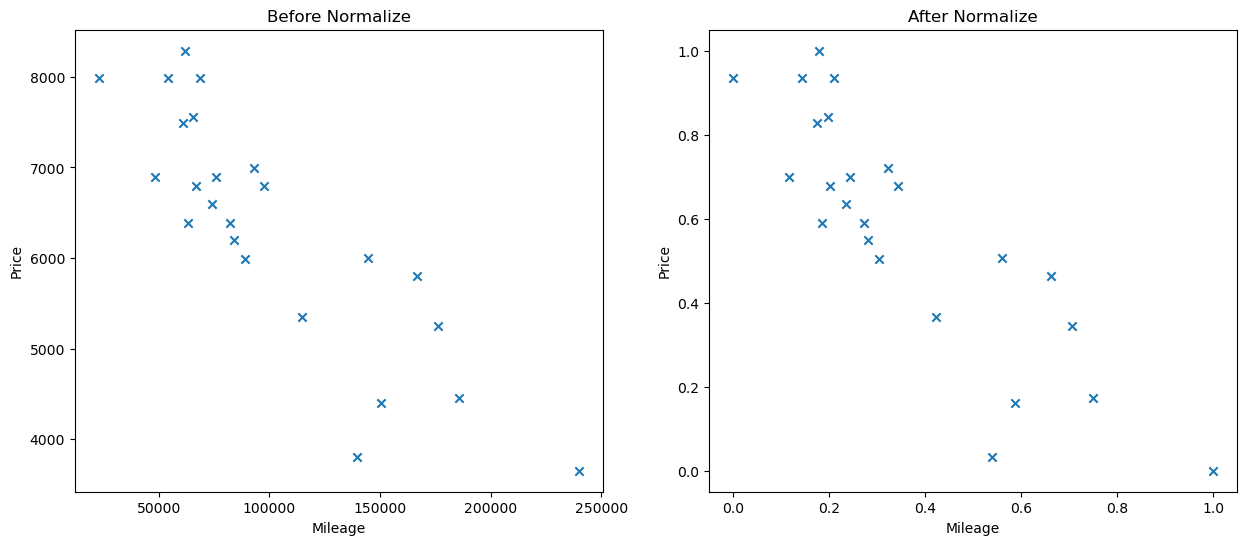

In [229]:
# Normalize mileage
x_range = np.max(x) - np.min(x)
x_norm = (x - np.min(x)) / x_range

# Normalize price
y_range = np.max(y) - np.min(y)
y_norm = (y - np.min(y)) / y_range

fig, ax = plt.subplots(1,2, figsize=(15, 6))
ax[0].scatter(x, y, marker='x')
ax[0].set(title="Before Normalize", xlabel="Mileage", ylabel="Price")

ax[1].scatter(x_norm, y_norm, marker='x')
ax[1].set(title="After Normalize", xlabel="Mileage", ylabel="Price")


## Fit model to get theta0 (c) and theta1 (m)

- m = theta1 = linear_regression_slope
- c = theta0 = linear_regression_intercept

Number of iteration = 171


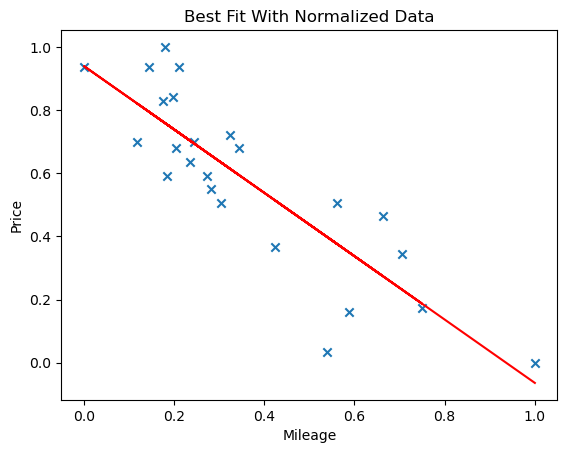

In [230]:
# Model parameters
LEARN_RATE = 1
ITERATION = 10000
CONVERGE_LIMIT = 0.00001

# Start learning with dummy value
c = 0
m = 0

# Learning process
for iter in range(ITERATION):
    sumError_c = 0
    sumError_m = 0
    for i in range (datasize):
        sumError_c += (x_norm[i] * m + c) - y_norm[i]
        sumError_m += ((x_norm[i] * m + c) - y_norm[i]) * x_norm[i]

    stepSize_c = LEARN_RATE * (1 / datasize) * sumError_c
    stepSize_m = LEARN_RATE * (1 / datasize) * sumError_m

    if (abs(stepSize_c) < CONVERGE_LIMIT and abs(stepSize_m) < CONVERGE_LIMIT):
        break

    c = c - stepSize_c
    m = m - stepSize_m

c,m

fig, ax = plt.subplots() 
ax.scatter(x_norm, y_norm, marker='x')
ax.set(title="Best Fit With Normalized Data", xlabel="Mileage", ylabel="Price")
ax.plot(x_norm, x_norm * m + c, color="r")

print(f"Number of iteration = {iter}")



## Denormalize theta0 (c) and theta1 (m)

In [231]:
final_m = m * (y_range / x_range)
final_c = c * (y_range) + np.min(y) - (final_m * np.min(x))

print(f"The expected value for m = {expected_m:.9} & c = {expected_c:.9}")
print(f"The learning algo get m = {final_m:.9} & c = {final_c:.9}")

The expected value for m = -0.0214489636 & c = 8499.59965
The learning algo get m = -0.0214447599 & c = 8499.15763


## Visualize final result

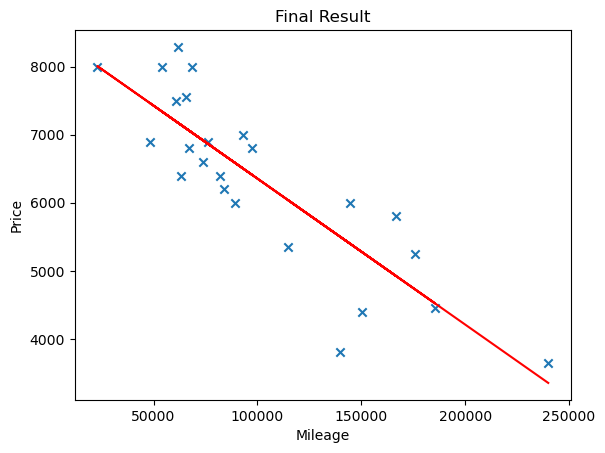

In [232]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker='x')
ax.set(title="Final Result", xlabel="Mileage", ylabel="Price")
ax.plot(x, x * final_m + final_c, color="r")